# AirBnB Fair Valuation

Goal: Set the competitive **daily accomodation rate** for a client's house in Bondi Beach. The owner currently charges $500. We have been tasked to estimate a **fair value** that the owner should be charging. The house has the following characteristics and constraints. While developing this model you came to realise that Airbnb can use your model to estimate the fair value of any property on their database, your are effectively creating a recommendation model for all prospective hosts!


1. The owner has been a host since **August 2010**
1. The location is **lon:151.274506, lat:33.889087**
1. The current review score rating **95.0**
1. Number of reviews **53**
1. Minimum nights **4**
1. The house can accomodate **10** people.
1. The owner currently charges a cleaning fee of **370**
1. The house has **3 bathrooms, 5 bedrooms, 7 beds**.
1. The house is available for **255 of the next 365 days**
1. The client is **verified**, and they are a **superhost**.
1. The cancelation policy is **strict with a 14 days grace period**.
1. The host requires a security deposit of **$1,500**


*All values strictly apply to the month of July 2018*

In [6]:
# Defining our Sample Client Data
from dateutil import parser
dict_client = {}

dict_client["city"] = "Bondi Beach"
dict_client["longitude"] = 151.274506
dict_client["latitude"] = -33.889087
dict_client["review_scores_rating"] = 95
dict_client["number_of_reviews"] = 53
dict_client["minimum_nights"] = 4
dict_client["accommodates"] = 10
dict_client["bathrooms"] = 3
dict_client["bedrooms"] = 5
dict_client["beds"] = 7
dict_client["security_deposit"] = 1500
dict_client["cleaning_fee"] = 370
dict_client["property_type"] = "House"
dict_client["room_type"] = "Entire home/apt"
dict_client["availability_365"] = 255
dict_client["host_identity_verified"] = 't'  ## 1 for yes, 0 for no
dict_client["host_is_superhost"] = 't'
dict_client["cancellation_policy"] = "strict_14_with_grace_period"
dict_client["host_since"] = parser.parse("01-08-2010")

# Import Data

In [11]:
import numpy as np
import os
import pandas as pd
from pathlib import Path

#Source - Github
github_p = "https://raw.githubusercontent.com/Finance-781/FinML/master/Lecture%202%20-%20End-to-End%20ML%20Project%20/Practice/"

my_file = Path("datasets/sydney_airbnb.csv") # Defines path
if my_file.is_file():              # See if file exists
    print("Local file found")      
    df = pd.read_csv('datasets/sydney_airbnb.csv')
else:
    print("Be patient: loading from github (2 minutes)")
    df = pd.read_csv(github_p+'datasets/sydney_airbnb.csv')
    print("Done")

Be patient: loading from github (2 minutes)
Done


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (36,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...","$150.00 key security deposit, refundable on re...",It is 7 minutes walk to the Kings Cross.train ...,Kitchen & laundry facilities. Shared bathroom.,...,10.0,10.0,10.0,9.0,f,moderate,f,f,1,1.69
1,12351,https://www.airbnb.com/rooms/12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,"Pyrmont is an inner-city village of Sydney, on...",We've a few reasons for the 6.00pm arrival tim...,Our home is centrally located and an easy walk...,We look forward to welcoming you just as we wo...,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,t,t,2,4.83
2,14250,https://www.airbnb.com/rooms/14250,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,NaN,Balgowlah - Manly bus # 131 or #132 (Bus stop...,Guests have access to whole house except locke...,...,10.0,8.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2,0.03
3,14935,https://www.airbnb.com/rooms/14935,Eco-conscious Travellers: Private Room,Welcome! This apartment will suit a short term...,I live upstairs in my own room with my own bat...,Welcome! This apartment will suit a short term...,NaN,"The building can be hard to find, so please en...",DIRECTIONS VIA TAXI: Get dropped off at Renwic...,"I work from home most times - so if I'm home, ...",...,9.0,10.0,9.0,9.0,f,moderate,f,f,2,2.14
4,14974,https://www.airbnb.com/rooms/14974,Eco-conscious Traveller: Sofa Couch,Welcome! This apartment will suit a short term...,Comes with a fully equipped gym and pool - whi...,Welcome! This apartment will suit a short term...,NaN,I live upstairs in my own room with my own bat...,DIRECTIONS VIA TAXI: Get dropped off at Renwic...,"I work from home most times - so if I'm home, ...",...,9.0,9.0,9.0,9.0,f,moderate,f,f,2,1.78


In [15]:
#Save local copy of data for reference
#df.to_csv(path_or_buf = '/Users/eduardowaldoalcantara/LocalDocuments/portfolio/AirBnB Price Prediction/sydney_airbnb.csv')

In [9]:
#Features to include - arbitrary choice on which features we want to focus on
incl = ["price","city","longitude","latitude","review_scores_rating","number_of_reviews","minimum_nights","security_deposit","cleaning_fee",
        "accommodates","bathrooms","bedrooms","beds","property_type","room_type","availability_365" ,"host_identity_verified", 
        "host_is_superhost","host_since","cancellation_policy"] 

df = df[incl]

In [10]:
df.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,$65.00,Potts Point,151.226562,-33.869168,92.0,177,2,NaN,NaN,1,NaN,1.0,1.0,Apartment,Private room,339,f,t,23/09/09,moderate
1,$98.00,Pyrmont,151.191896,-33.865153,95.0,468,2,$0.00,$55.00,2,1.0,1.0,1.0,Townhouse,Private room,188,t,f,14/05/09,strict_14_with_grace_period
2,$469.00,Balgowlah,151.261722,-33.800929,100.0,1,5,$900.00,$100.00,6,3.0,3.0,3.0,House,Entire home/apt,168,t,f,20/11/09,strict_14_with_grace_period
3,$63.00,Redfern,151.200450,-33.890765,89.0,172,2,NaN,NaN,2,1.0,1.0,1.0,Apartment,Private room,215,t,f,30/11/09,moderate
4,$39.00,Redfern,151.200896,-33.889667,90.0,147,2,NaN,NaN,1,2.0,1.0,1.0,Apartment,Shared room,287,t,f,30/11/09,moderate


In [5]:
df.shape

(27070, 20)

The price field currently has the "$" in it and is a string. So lets remove it and convert it to a float datatype.

Also lets convert the 'host_since' field to a date time format. 

In [16]:
# Importing regex
import re

# The price fields in our data frame
price_list = ["price","cleaning_fee","security_deposit"]

# We change any blanks to 0 and use our regex function to remove anything that isn't a number (or negative number which is changed to 0)
for col in price_list:
    df[col] = df[col].fillna("0")
    df[col] = df[col].apply(lambda x: float(re.compile('[^0-9eE.]').sub('', x)) if len(x)>0 else 0)

df['host_since'] = pd.to_datetime(df['host_since'])

In [17]:
# Let's see if it worked
df["price"].head()

0     65.0
1     98.0
2    469.0
3     63.0
4     39.0
Name: price, dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 84 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                27070 non-null  int64         
 1   listing_url                       27070 non-null  object        
 2   name                              27056 non-null  object        
 3   summary                           26765 non-null  object        
 4   space                             18808 non-null  object        
 5   description                       27045 non-null  object        
 6   neighborhood_overview             16114 non-null  object        
 7   notes                             11406 non-null  object        
 8   transit                           16863 non-null  object        
 9   access                            16666 non-null  object        
 10  interaction                       15318 non-nu

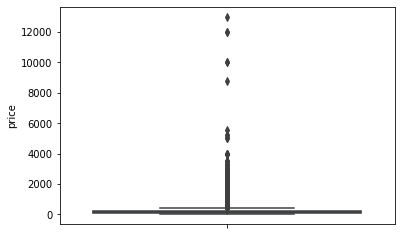

In [19]:
## Use a boxplot to check for high price values (outliers)
import seaborn as sns

sns.boxplot( y=df["price"] )

In [20]:
# We can see a few high value pries, with the majority being close to bottom (seems like ~100-200)

# We now use skew to check for the symmetry of the data distribution (0 being perfectly symmetrical)
# https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics
df["price"].skew()

13.808558337216192

In [21]:
# We can also use Kurtosis to analyze our data
# “Kurtosis is the degree of peakedness of a distribution” – Wolfram MathWorld

df["price"].kurtosis()

413.4301463784445

In [22]:
## So in order to remove or filter out our high value 'outliers' let's consider taking our data from the 99.5% percentile and exclude the bottom .25% and top 0.25% of prices
## This function returns the highest value of the 99.5% percentile which is still relatively high when compared to the mean and median
print(df["price"].quantile(0.995))
print(df["price"].mean())
print(df["price"].median())

1600.0
209.27879571481344
135.0


In [23]:
# Now we remove all prices over the 99.5% percentile (or in order words, we keep all data rows under the 99.5% value of 1600)
df = df[df["price"]<df["price"].quantile(0.995)].reset_index(drop=True)

In [24]:
# Let's check our skew now
df["price"].skew()

2.957872457159033

In [25]:
# Let's check our data for null values
df.isnull().sum()

id                                     0
listing_url                            0
name                                  14
summary                              305
space                               8230
                                    ... 
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
calculated_host_listings_count         0
reviews_per_month                   6733
Length: 84, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26931 entries, 0 to 26930
Data columns (total 84 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                26931 non-null  int64         
 1   listing_url                       26931 non-null  object        
 2   name                              26917 non-null  object        
 3   summary                           26626 non-null  object        
 4   space                             18701 non-null  object        
 5   description                       26906 non-null  object        
 6   neighborhood_overview             16036 non-null  object        
 7   notes                             11336 non-null  object        
 8   transit                           16811 non-null  object        
 9   access                            16602 non-null  object        
 10  interaction                       15247 non-nu

In [27]:
print(df["cancellation_policy"].value_counts())
print(df["city"].value_counts())
print(df["property_type"].value_counts())
print(df["room_type"].value_counts())

strict_14_with_grace_period    11585
flexible                        8538
moderate                        6776
super_strict_60                   31
super_strict_30                    1
Name: cancellation_policy, dtype: int64
Bondi Beach                1671
Manly                       958
Surry Hills                 919
Bondi                       785
Randwick                    684
                           ... 
Neutral Bay                   1
Eagle Vale                    1
Brighton Le Sands             1
Centennial Park, Sydney       1
Maraylya                      1
Name: city, Length: 741, dtype: int64
Apartment                 15901
House                      7722
Townhouse                  1145
Condominium                 351
Guest suite                 350
Guesthouse                  287
Villa                       201
Loft                        175
Bed and breakfast           156
Other                       147
Bungalow                    118
Cabin                        77
S

In [28]:
df.describe()

,id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,2.693100e+04,2.693100e+04,26897.000000,26897.000000,0.0,26931.000000,26931.000000,26931.000000,26909.000000,26923.000000,...,26931.000000,19465.000000,19416.000000,19437.000000,19390.000000,19432.000000,19390.000000,19384.000000,26931.000000,20198.000000
mean,1.402366e+07,4.697544e+07,7.464699,7.464699,NaN,-33.862675,151.210438,3.357395,1.340964,1.600787,...,14.070031,93.404932,9.551607,9.242579,9.745023,9.742075,9.647138,9.329395,6.042256,0.973560
std,6.522550e+06,4.526606e+07,27.053205,27.053205,NaN,0.071861,0.079425,2.160004,0.638187,1.091213,...,29.870227,9.358515,0.911434,1.193323,0.747696,0.775549,0.732092,1.000330,21.195248,1.460142
min,1.115600e+04,8.346000e+03,0.000000,0.000000,NaN,-34.135212,150.644964,1.000000,0.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,9.082494e+06,1.110694e+07,1.000000,1.000000,NaN,-33.897653,151.184336,2.000000,1.000000,1.000000,...,1.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.140000
50%,1.544077e+07,3.025155e+07,1.000000,1.000000,NaN,-33.883161,151.223029,2.000000,1.000000,1.000000,...,3.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.360000
75%,2.015486e+07,6.768799e+07,2.000000,2.000000,NaN,-33.832189,151.264706,4.000000,1.500000,2.000000,...,13.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.197500
max,2.270966e+07,1.674985e+08,461.000000,461.000000,NaN,-33.389728,151.339811,16.000000,10.000000,46.000000,...,468.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,177.000000,64.660000


# Data Exploration

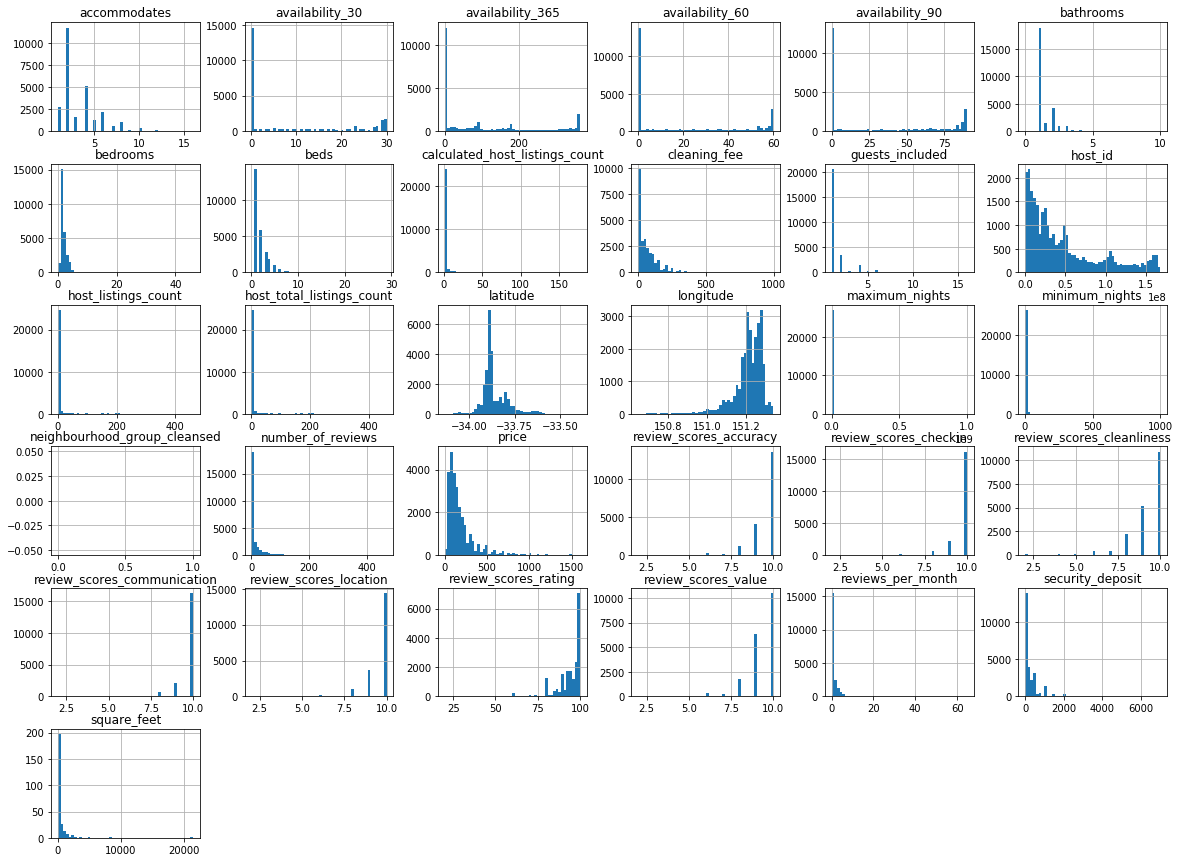

In [31]:
# Plot the distribution of each variable
%matplotlib inline
import matplotlib.pyplot as plt

try:
    # We select all rows and all columns after the 6th
    df.iloc[:,6:].hist(bins=50, figsize=(20,15))
    #save_fig("attribute_histogram_plots")
    plt.show()
except AttributeError:
    pass


In [32]:
## We keep all the city types to create our model (more is data usually better), even though our customer, specifcally wants information about Bondi Beach 

df["city"].value_counts().head(10)

Bondi Beach     1671
Manly            958
Surry Hills      919
Bondi            785
Randwick         684
Sydney           682
Coogee           675
Darlinghurst     660
North Bondi      629
Newtown          490
Name: city, dtype: int64

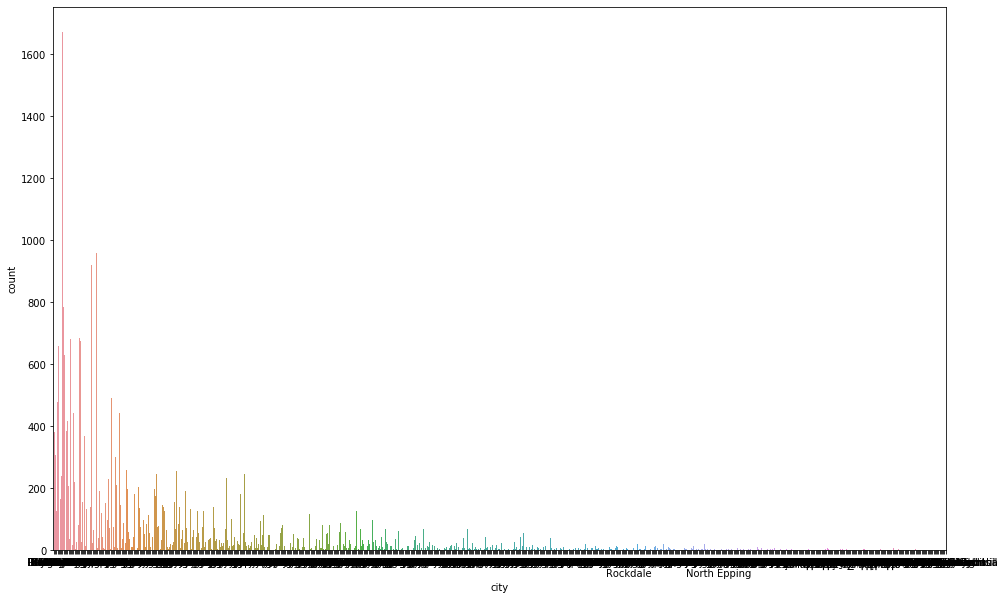

In [33]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x="city", data=df)

In [34]:
## For this taks we will keep the top 20 Sydney locations

list_of_20 = list(df["city"].value_counts().head(10).index)
df = df[df["city"].isin(list_of_20)].reset_index(drop=True)

In [35]:
df["property_type"].value_counts()

Apartment             5970
House                 1497
Townhouse              271
Condominium            115
Loft                    59
Guest suite             44
Other                   33
Hostel                  30
Bed and breakfast       25
Guesthouse              24
Serviced apartment      23
Villa                   16
Bungalow                 7
Tent                     6
Boutique hotel           6
Cottage                  6
Resort                   5
Tiny house               5
Hotel                    3
Cabin                    2
Camper/RV                1
Chalet                   1
Yurt                     1
Earth house              1
Houseboat                1
Aparthotel               1
Name: property_type, dtype: int64

In [36]:
# We now remove the rare occurences in categories as it's necessary for the cross validation step
# the below step is somewhat similar for what has been done with cities above

# We store the counts of each type in the variable item_counts
item_counts = df.groupby(['property_type']).size()

# Store a list of the rare property types here i.e. the types that have a count less than 10 
rare_items = list(item_counts.loc[item_counts <= 10].index.values)

# drop the property types that were rare
df = df[~df["property_type"].isin(rare_items)].reset_index(drop=True)

# Sanity check
df["property_type"].value_counts()

Apartment             5970
House                 1497
Townhouse              271
Condominium            115
Loft                    59
Guest suite             44
Other                   33
Hostel                  30
Bed and breakfast       25
Guesthouse              24
Serviced apartment      23
Villa                   16
Name: property_type, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [38]:
test_set.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
4084,14601769,https://www.airbnb.com/rooms/14601769,Bondi beach king room beautiful share house,"In the back streets of North Bondi, sheltered ...",Garden Big balcony with barbacue Living room w...,"In the back streets of North Bondi, sheltered ...",short walking distance to the beach 30 seconds...,NaN,bus stop 30 seconds away parking spot included,All shared rooms + garden + parking space,...,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,f,f,1,0.14
965,4485768,https://www.airbnb.com/rooms/4485768,WONDERFUL WINTER SPOT ‚ô° Location Perfect!,Perfectly located for you to experience Sydney...,"Super tidy and loved home. Open space living,...",Perfectly located for you to experience Sydney...,One of the most sought after areas to live in ...,"Enjoy your Sydney experience and our home. ""M...",It's super easy to get around from here! In t...,You'll have access to: - A 55 inch LED Samsung...,...,9.0,10.0,10.0,9.0,f,moderate,f,f,3,0.09
8100,22692475,https://www.airbnb.com/rooms/22692475,Location is everything! Secure 1BR Apt,It's a simple one bedroom apartment right in t...,The apartment has a rooftop with city skyline ...,It's a simple one bedroom apartment right in t...,Right on William Street in the heart of it all...,NaN,"Train station is 100m up the road, and buses g...",Guests can use bathroom amenities provided - s...,...,10.0,10.0,10.0,10.0,f,moderate,f,f,1,1.71
3882,13790226,https://www.airbnb.com/rooms/13790226,Heart of darling harbour uts Uni,Great location good place walk to everywhere,Good space handy location,Great location good place walk to everywhere G...,China town,Restaurants every where pub club aquatic centre,Bus taxi train tram ferry very close,Sydney heart Cbd darling harbour Sydney univer...,...,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN
1010,4582940,https://www.airbnb.com/rooms/4582940,Beach Pad w/ Sunny Private Garden,Chilled 1 bedroom beach pad located in a quite...,"The apartment has a great retro, chilled vibe....",Chilled 1 bedroom beach pad located in a quite...,Bondi and the surrounding Eastern Suburbs have...,Open to discussion on rates for extended stays...,Buses to the city centre and Bondi Junction ca...,Guests have access to everything in the apartm...,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,1,0.10


In [39]:
##  Similar to above encoding, here we encode binary 1, 0 for t and f. 

df["host_identity_verified"] = df["host_identity_verified"].apply(lambda x: 1 if x=="t" else 0)
df["host_is_superhost"] = df["host_is_superhost"].apply(lambda x: 1 if x=="t" else 0)

In [40]:
# We need to convert our categorical columns to numeric, so we use the sklearn's funtion LabelEncoder to do this
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for col in ["city"]:
    df[col+"_code"] = le.fit_transform(df[col])

In [41]:
df.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,city_code
0,15253,https://www.airbnb.com/rooms/15253,Stunning Penthouse Apartment In Heart Of The City,Penthouse living in a great central location: ...,"A charming two-level, two-bedroom, two-bathroo...",Penthouse living in a great central location: ...,The location is really central and there is nu...,The apartment is on the top floor with 4 fligh...,If walking is not your thing I am well service...,Guests have own key and access to use faciliti...,...,9.0,9.0,9.0,t,strict_14_with_grace_period,f,f,2,3.51,3
1,45440,https://www.airbnb.com/rooms/45440,Rubys at Bondi Beach! A stone's throw to the b...,A stone's throw to Bondi Beach. Right in among...,"Whether you‚Äôre an active morning person, a s...",A stone's throw to Bondi Beach. Right in among...,NaN,NaN,NaN,NaN,...,10.0,10.0,9.0,f,strict_14_with_grace_period,f,f,7,0.94,1
2,49698,https://www.airbnb.com/rooms/49698,You'll love your stay at Bondi Ocean Views,We welcome you to enjoy top floor ocean views ...,We welcome you to enjoy top floor ocean views ...,We welcome you to enjoy top floor ocean views ...,Welcome yourself to Bondi Beach where you can ...,Timed Street parking only: 2hrs from 8am - 6pm...,5 minute walk to Campbell parade / Bondi Road ...,Guests have access of the entire apartment. Th...,...,10.0,10.0,9.0,f,strict_14_with_grace_period,f,f,57,0.16,0
3,56842,https://www.airbnb.com/rooms/56842,Beach Breeze 2 BDR + Double balcony+ LOCATION !,Amazing location just 3 minutes walk to the be...,Gorgeous two bedroom apartment with private ba...,Amazing location just 3 minutes walk to the be...,NaN,There is street parking only ( free and no per...,Local bus stop is 2 minutes walk from apartmen...,The entire home and private balconies.,...,9.0,10.0,8.0,f,strict_14_with_grace_period,f,f,57,0.24,6
4,57183,https://www.airbnb.com/rooms/57183,BONDI BEACHFRONT CENTRAL LOCATION,"This large, light-filled and artistically deco...",BONDI BEACHFRONT BOHEMIAN APARTMENT Why stay a...,"This large, light-filled and artistically deco...",The most exciting and entertaining neighborhoo...,Large ceiling fans rather than air conditionin...,"Buses and taxis right at the door, so plentifu...","Entire apartment, plenty of cupboard space. D...",...,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,1,1.30,1


### Stratified Shuffle Split cross-validator

Provides train/test indices to split data in train/test sets.

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

## we will stratify according to city

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["city_code"]):
    del df["city_code"]
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [43]:
## Average price per area
strat_test_set.groupby("city")["price"].mean()

city
Bondi           198.745223
Bondi Beach     199.879880
Coogee          196.574627
Darlinghurst    184.700000
Manly           223.447368
Newtown         117.938776
North Bondi     248.857143
Randwick        178.072993
Surry Hills     175.732240
Sydney          193.962687
Name: price, dtype: float64

# Further Data Exploration and Visualization

In [44]:
traval = strat_train_set.copy() ##traval - training and validation set

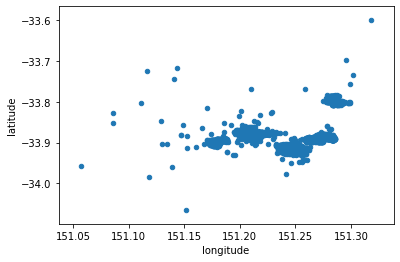

In [46]:
# Let's plot our cordinates which is a way of visualizing a map of the locations

traval.plot(kind="scatter", x="longitude", y="latitude")


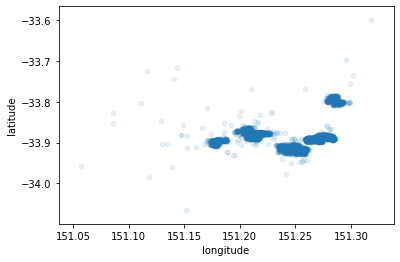

In [47]:
traval.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [48]:
# Let's narrow our visual map and remove locations outside the main area
traval_co = traval[(traval["longitude"]>151.16)&(traval["latitude"]<-33.75)].reset_index(drop=True)

traval_co = traval_co[traval_co["latitude"]>-33.95].reset_index(drop=True)

# And only look at locations under $600
traval_co = traval_co[traval_co["price"]<600].reset_index(drop=True)

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611). Thanks to Wilmer Arellano for pointing it out.

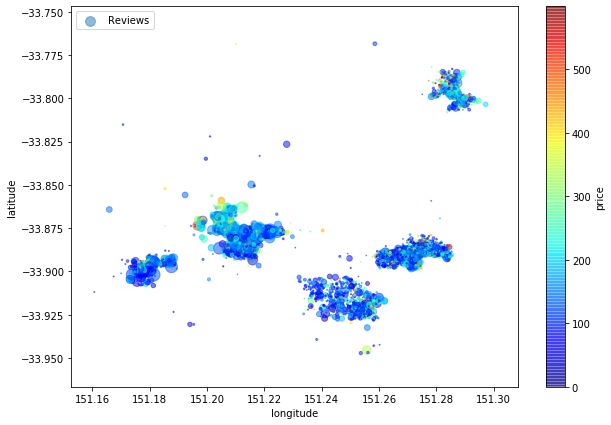

In [49]:
traval_co.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
    s=traval_co["number_of_reviews"]/2, label="Reviews", figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [50]:
traval_co.shape

(6230, 84)

Text(0.5, 1, 'Heatmap of Correlation Matrix')

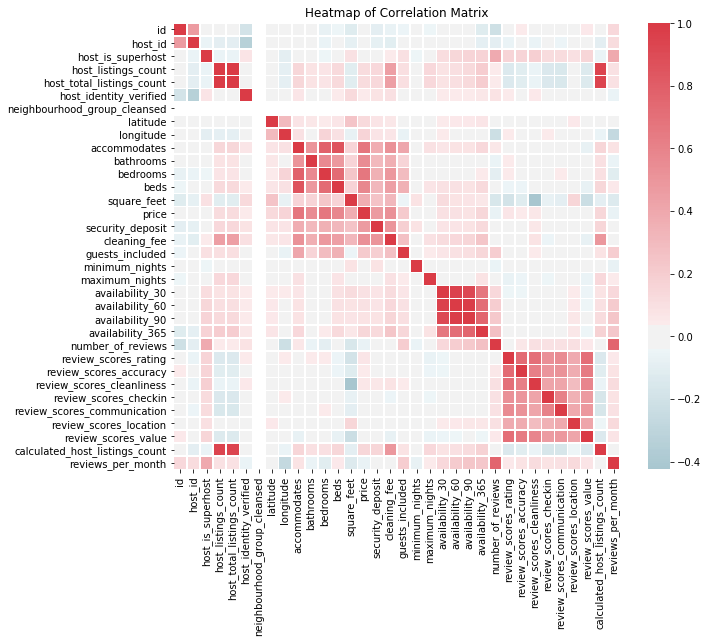

In [51]:
# Now let's explore our correlation matrix

corr_matrix = traval.corr()

# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

#Deep dive into diverging_pattern
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,
           yticklabels=corr_matrix.columns.values, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [52]:
corr_matrix["price"].sort_values(ascending=False)

price                             1.000000
accommodates                      0.674368
bedrooms                          0.668963
beds                              0.582378
bathrooms                         0.553773
cleaning_fee                      0.529834
security_deposit                  0.469423
square_feet                       0.367262
guests_included                   0.214009
longitude                         0.157902
availability_365                  0.148263
calculated_host_listings_count    0.144556
latitude                          0.131160
host_total_listings_count         0.126400
host_listings_count               0.126400
availability_30                   0.093521
availability_60                   0.088298
availability_90                   0.087344
review_scores_rating              0.067066
review_scores_cleanliness         0.059491
host_identity_verified            0.048821
review_scores_accuracy            0.045240
review_scores_checkin             0.033238
review_scor

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126be6210>,
      dtype=object)

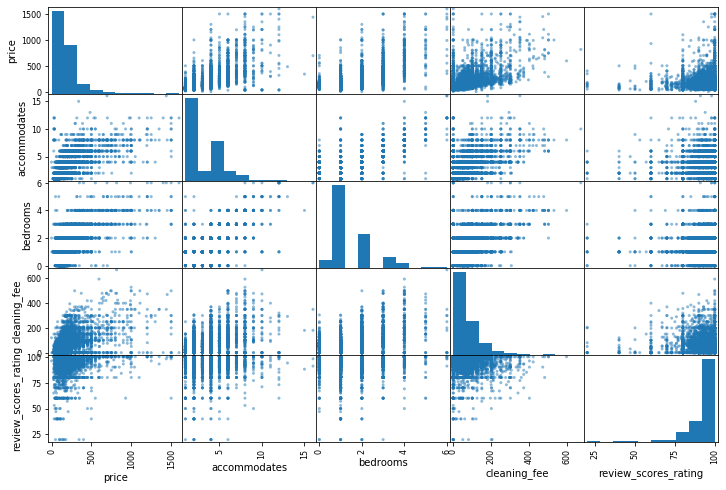

In [53]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["price", "accommodates", "bedrooms",
              "cleaning_fee","review_scores_rating"]
scatter_matrix(traval[attributes], figsize=(12, 8))


Saving figure income_vs_house_value_scatterplot


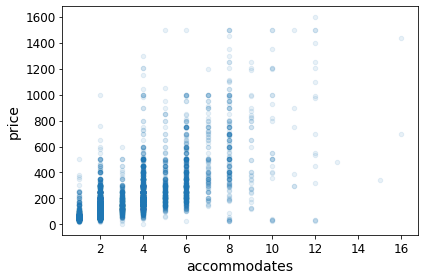

In [43]:
traval.plot(kind="scatter", x="accommodates", y="price", alpha=0.1)
save_fig("income_vs_house_value_scatterplot")

In [44]:
traval.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
5484,200.0,Newtown,151.178552,-33.907150,96.0,61,2,250.0,85.0,4,1.0,2.0,2.0,House,Entire home/apt,127,1,0,2016-01-22,moderate
1267,183.0,Randwick,151.249030,-33.906190,97.0,6,4,0.0,20.0,2,1.0,1.0,1.0,Apartment,Private room,0,1,0,2014-03-28,moderate
6658,175.0,Manly,151.288491,-33.802074,100.0,2,2,0.0,40.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,0,1,0,2014-01-09,strict_14_with_grace_period
2522,85.0,Randwick,151.236423,-33.913614,94.0,20,3,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,90,0,0,2015-11-22,flexible
722,80.0,Coogee,151.259342,-33.918435,92.0,139,30,0.0,0.0,3,1.0,1.0,2.0,Apartment,Private room,0,1,0,2014-01-07,strict_14_with_grace_period


In [0]:
#### Now let's create some new features

traval["bedrooms_per_person"] = traval["bedrooms"]/traval["accommodates"]
traval["bathrooms_per_person"] = traval["bathrooms"]/traval["accommodates"]
traval['host_since'] = pd.to_datetime(traval['host_since'])
traval['days_on_airbnb'] = (pd.to_datetime('today') - traval['host_since']).dt.days

In [46]:
traval.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
5484,200.0,Newtown,151.178552,-33.907150,96.0,61,2,250.0,85.0,4,1.0,2.0,2.0,House,Entire home/apt,127,1,0,2016-01-22,moderate,0.500000,0.250000,1462.0
1267,183.0,Randwick,151.249030,-33.906190,97.0,6,4,0.0,20.0,2,1.0,1.0,1.0,Apartment,Private room,0,1,0,2014-03-28,moderate,0.500000,0.500000,2127.0
6658,175.0,Manly,151.288491,-33.802074,100.0,2,2,0.0,40.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,0,1,0,2014-01-09,strict_14_with_grace_period,0.500000,0.500000,2205.0
2522,85.0,Randwick,151.236423,-33.913614,94.0,20,3,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,90,0,0,2015-11-22,flexible,0.500000,0.500000,1523.0
722,80.0,Coogee,151.259342,-33.918435,92.0,139,30,0.0,0.0,3,1.0,1.0,2.0,Apartment,Private room,0,1,0,2014-01-07,strict_14_with_grace_period,0.333333,0.333333,2207.0


# Prepare the data for Machine Learning algorithms

In [0]:
## Here I will forget about traval and use a more formal way of introducing...
## ..preprocessing using pipelines

In [0]:
# Firstly we remove our price (or labels from our travel dataset)
X  = traval.copy().drop("price", axis=1) # drop labels for training set

In [49]:
# Show the rows of data with missing values

sample_incomplete_rows = X[X.isnull().any(axis=1)].head()
print(sample_incomplete_rows.shape)
sample_incomplete_rows

(5, 22)


,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
5594,Randwick,151.238806,-33.913834,NaN,0,2,800.0,80.0,6,1.0,3.0,3.0,House,Entire home/apt,0,0,0,2013-11-27,moderate,0.500000,0.166667,2248.0
5439,Newtown,151.184469,-33.894582,NaN,0,3,5000.0,100.0,11,2.0,3.0,4.0,Apartment,Entire home/apt,0,1,0,2014-07-16,strict_14_with_grace_period,0.272727,0.181818,2017.0
3847,Bondi Beach,151.273077,-33.895142,NaN,0,7,271.0,27.0,2,1.0,1.0,1.0,Apartment,Private room,0,0,0,2015-12-07,strict_14_with_grace_period,0.500000,0.500000,1508.0
1312,Randwick,151.245793,-33.920622,NaN,0,3,0.0,80.0,3,1.0,2.0,2.0,Apartment,Entire home/apt,0,0,0,2015-10-02,strict_14_with_grace_period,0.666667,0.333333,1574.0
6194,Bondi Beach,151.273411,-33.888113,NaN,0,10,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,0,1,0,2015-08-14,moderate,0.500000,0.500000,1623.0


In [50]:
# Rows Remove
sample_incomplete_rows.dropna(subset=["review_scores_rating"])    # option 1

,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb


In [51]:
# Columns Remove
sample_incomplete_rows.drop(["review_scores_rating"], axis=1)       # option 2

,city,longitude,latitude,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
5594,Randwick,151.238806,-33.913834,0,2,800.0,80.0,6,1.0,3.0,3.0,House,Entire home/apt,0,0,0,2013-11-27,moderate,0.500000,0.166667,2248.0
5439,Newtown,151.184469,-33.894582,0,3,5000.0,100.0,11,2.0,3.0,4.0,Apartment,Entire home/apt,0,1,0,2014-07-16,strict_14_with_grace_period,0.272727,0.181818,2017.0
3847,Bondi Beach,151.273077,-33.895142,0,7,271.0,27.0,2,1.0,1.0,1.0,Apartment,Private room,0,0,0,2015-12-07,strict_14_with_grace_period,0.500000,0.500000,1508.0
1312,Randwick,151.245793,-33.920622,0,3,0.0,80.0,3,1.0,2.0,2.0,Apartment,Entire home/apt,0,0,0,2015-10-02,strict_14_with_grace_period,0.666667,0.333333,1574.0
6194,Bondi Beach,151.273411,-33.888113,0,10,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,0,1,0,2015-08-14,moderate,0.500000,0.500000,1623.0


In [52]:
median = X["review_scores_rating"].median()
sample_incomplete_rows["review_scores_rating"].fillna(median, inplace=True) # option 3

sample_incomplete_rows

,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
5594,Randwick,151.238806,-33.913834,96.0,0,2,800.0,80.0,6,1.0,3.0,3.0,House,Entire home/apt,0,0,0,2013-11-27,moderate,0.500000,0.166667,2248.0
5439,Newtown,151.184469,-33.894582,96.0,0,3,5000.0,100.0,11,2.0,3.0,4.0,Apartment,Entire home/apt,0,1,0,2014-07-16,strict_14_with_grace_period,0.272727,0.181818,2017.0
3847,Bondi Beach,151.273077,-33.895142,96.0,0,7,271.0,27.0,2,1.0,1.0,1.0,Apartment,Private room,0,0,0,2015-12-07,strict_14_with_grace_period,0.500000,0.500000,1508.0
1312,Randwick,151.245793,-33.920622,96.0,0,3,0.0,80.0,3,1.0,2.0,2.0,Apartment,Entire home/apt,0,0,0,2015-10-02,strict_14_with_grace_period,0.666667,0.333333,1574.0
6194,Bondi Beach,151.273411,-33.888113,96.0,0,10,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,0,1,0,2015-08-14,moderate,0.500000,0.500000,1623.0


In [0]:
# let's fill in the missing values using sklearn's imputer, we employ the median strategy here
# Note the code below is different from the video as the old Imputer function has been depracted

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [0]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 

X['host_is_superhost'] = X['host_is_superhost'].eq('t').astype(int)
X['host_identity_verified'] = X['host_identity_verified'].eq('t').astype(int)
X.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
5484,Newtown,151.178552,-33.907150,96.0,61,2,250.0,85.0,4,1.0,2.0,2.0,House,Entire home/apt,127,0,0,2016-01-22,moderate,0.500000,0.250000,1395.0
1267,Randwick,151.249030,-33.906190,97.0,6,4,0.0,20.0,2,1.0,1.0,1.0,Apartment,Private room,0,0,0,2014-03-28,moderate,0.500000,0.500000,2060.0
6658,Manly,151.288491,-33.802074,100.0,2,2,0.0,40.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,0,0,0,2014-01-09,strict_14_with_grace_period,0.500000,0.500000,2138.0
2522,Randwick,151.236423,-33.913614,94.0,20,3,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,90,0,0,2015-11-22,flexible,0.500000,0.500000,1456.0
722,Coogee,151.259342,-33.918435,92.0,139,30,0.0,0.0,3,1.0,1.0,2.0,Apartment,Private room,0,0,0,2014-01-07,strict_14_with_grace_period,0.333333,0.333333,2140.0


Remove the text attribute because median can only be calculated on numerical attributes:

In [0]:
# Columns with missing categorical values can't be imputed so we have no alternative but to drop them

cat_cols = ["city","cancellation_policy","host_since","room_type","property_type","host_since"]
X_num = X.drop(cat_cols, axis=1)
X_num.head()

,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365,host_identity_verified,host_is_superhost,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
5484,151.178552,-33.907150,96.0,61,2,250.0,85.0,4,1.0,2.0,2.0,127,0,0,0.500000,0.250000,1395.0
1267,151.249030,-33.906190,97.0,6,4,0.0,20.0,2,1.0,1.0,1.0,0,0,0,0.500000,0.500000,2060.0
6658,151.288491,-33.802074,100.0,2,2,0.0,40.0,2,1.0,1.0,1.0,0,0,0,0.500000,0.500000,2138.0
2522,151.236423,-33.913614,94.0,20,3,0.0,0.0,2,1.0,1.0,1.0,90,0,0,0.500000,0.500000,1456.0
722,151.259342,-33.918435,92.0,139,30,0.0,0.0,3,1.0,1.0,2.0,0,0,0,0.333333,0.333333,2140.0


In [0]:
imputer.fit(X_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [0]:
imputer.statistics_

array([ 1.51259665e+02, -3.38885369e+01,  9.60000000e+01,  3.00000000e+00,
        3.00000000e+00,  0.00000000e+00,  5.00000000e+01,  2.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  4.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.00000000e-01,  5.00000000e-01,
        1.82100000e+03])

Check that this is the same as manually computing the median of each attribute:

In [0]:
X_num.median().values

array([ 1.51259665e+02, -3.38885369e+01,  9.60000000e+01,  3.00000000e+00,
        3.00000000e+00,  0.00000000e+00,  5.00000000e+01,  2.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  4.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.00000000e-01,  5.00000000e-01,
        1.82100000e+03])

Transform the training set:

In [0]:
X_num_np = imputer.transform(X_num)

In [0]:
X_num = pd.DataFrame(X_num_np, columns=X_num.columns,
                          index = list(X_num.index.values))

In [0]:
X_num.loc[sample_incomplete_rows.index.values]

,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365,host_identity_verified,host_is_superhost,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
5594,151.238806,-33.913834,96.0,0.0,2.0,800.0,80.0,6.0,1.0,3.0,3.0,0.0,0.0,0.0,0.500000,0.166667,2181.0
5439,151.184469,-33.894582,96.0,0.0,3.0,5000.0,100.0,11.0,2.0,3.0,4.0,0.0,0.0,0.0,0.272727,0.181818,1950.0
3847,151.273077,-33.895142,96.0,0.0,7.0,271.0,27.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.500000,0.500000,1441.0
1312,151.245793,-33.920622,96.0,0.0,3.0,0.0,80.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,0.666667,0.333333,1507.0
6194,151.273411,-33.888113,96.0,0.0,10.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.500000,0.500000,1556.0


In [0]:
imputer.strategy

'median'

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [0]:
X_cat = X.select_dtypes(include=[object])
X_cat.head(10)

,city,property_type,room_type,cancellation_policy
5484,Newtown,House,Entire home/apt,moderate
1267,Randwick,Apartment,Private room,moderate
6658,Manly,Apartment,Entire home/apt,strict_14_with_grace_period
2522,Randwick,Apartment,Private room,flexible
722,Coogee,Apartment,Private room,strict_14_with_grace_period
3150,Manly,Apartment,Entire home/apt,strict_14_with_grace_period
2865,Surry Hills,Apartment,Entire home/apt,strict_14_with_grace_period
4906,Bondi Beach,Apartment,Entire home/apt,strict_14_with_grace_period
575,Coogee,Apartment,Entire home/apt,strict_14_with_grace_period
5827,Newtown,House,Private room,flexible


In [0]:
from sklearn.preprocessing import OrdinalEncoder

In [0]:
X_cat.head()

,city,property_type,room_type,cancellation_policy
5484,Newtown,House,Entire home/apt,moderate
1267,Randwick,Apartment,Private room,moderate
6658,Manly,Apartment,Entire home/apt,strict_14_with_grace_period
2522,Randwick,Apartment,Private room,flexible
722,Coogee,Apartment,Private room,strict_14_with_grace_period


In [0]:
ordinal_encoder = OrdinalEncoder()
X_cat_enc = ordinal_encoder.fit_transform(X_cat)
X_cat_enc[:10]

array([[5., 6., 0., 1.],
       [7., 0., 1., 1.],
       [4., 0., 0., 2.],
       [7., 0., 1., 0.],
       [2., 0., 1., 2.],
       [4., 0., 0., 2.],
       [8., 0., 0., 2.],
       [1., 0., 0., 2.],
       [2., 0., 0., 2.],
       [5., 6., 1., 0.]])

In [0]:
ordinal_encoder.categories_

[array(['Bondi', 'Bondi Beach', 'Coogee', 'Darlinghurst', 'Manly',
        'Newtown', 'North Bondi', 'Randwick', 'Surry Hills', 'Sydney'],
       dtype=object),
 array(['Apartment', 'Bed and breakfast', 'Condominium', 'Guest suite',
        'Guesthouse', 'Hostel', 'House', 'Loft', 'Other',
        'Serviced apartment', 'Townhouse', 'Villa'], dtype=object),
 array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object),
 array(['flexible', 'moderate', 'strict_14_with_grace_period',
        'super_strict_60'], dtype=object)]

In [0]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
X_cat_1hot = cat_encoder.fit_transform(X_cat)
X_cat_1hot

<6485x29 sparse matrix of type '<class 'numpy.float64'>'
	with 25940 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [0]:
X_cat_1hot.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [0]:
cat_encoder = OneHotEncoder(sparse=False)
X_cat_1hot = cat_encoder.fit_transform(X_cat)
X_cat_1hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [0]:
cat_encoder.categories_

[array(['Bondi', 'Bondi Beach', 'Coogee', 'Darlinghurst', 'Manly',
        'Newtown', 'North Bondi', 'Randwick', 'Surry Hills', 'Sydney'],
       dtype=object),
 array(['Apartment', 'Bed and breakfast', 'Condominium', 'Guest suite',
        'Guesthouse', 'Hostel', 'House', 'Loft', 'Other',
        'Serviced apartment', 'Townhouse', 'Villa'], dtype=object),
 array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object),
 array(['flexible', 'moderate', 'strict_14_with_grace_period',
        'super_strict_60'], dtype=object)]

Let's create a custom transformer to add extra attributes:

#### **Now let's create a pipeline for preprocessing that is built on the techniques we used up and till now and introduce some new pipeline techniques.**

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Receive numpy array, convert to pandas for features, convert back to array for output.

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, popularity = True, num_cols=[]): # no *args or **kargs
        self.popularity = popularity
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        
        ### Some feature engineering
        X = pd.DataFrame(X, columns=num_cols)
        X["bedrooms_per_person"] = X["bedrooms"]/X["accommodates"]
        X["bathrooms_per_person"] = X["bathrooms"]/X["accommodates"]
        
        global feats
        feats = ["bedrooms_per_person","bathrooms_per_person"]

        if self.popularity:
            X["past_and_future_popularity"]=X["number_of_reviews"]/(X["availability_365"]+1)
            feats.append("past_and_future_popularity")
            
            return X.values
        else:
            return X.values
        

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

strat_train_set2 = strat_train_set.dropna()
X = strat_train_set2.copy().drop("price",axis=1)
Y = strat_train_set2["price"]

num_cols = list(X.select_dtypes(include=numerics).columns)
cat_cols = list(X.select_dtypes(include=[object]).columns)

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder(num_cols=num_cols,popularity=True)),
        ('std_scaler', StandardScaler()),
    ])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


**Warning**: earlier versions of the book applied different transformations to different columns using a solution based on a `DataFrameSelector` transformer and a `FeatureUnion` (see below). It is now preferable to use the `ColumnTransformer` class that will is introduced in Scikit-Learn 0.20. 

In [0]:
from sklearn.compose import ColumnTransformer
import itertools


numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

mid_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_cols),
        ("cat", OneHotEncoder(),cat_cols ),
    ])

In [0]:
mid_pipeline.fit(X) # this one specifically has to be fitted for the cat names
cat_encoder = mid_pipeline.named_transformers_["cat"]
sublists = [list(bas) for bas in cat_encoder.categories_]
one_cols = list(itertools.chain(*sublists))

## In this class, I will be converting numpy back to pandas

class ToPandasDF(BaseEstimator, TransformerMixin):
    def __init__(self, fit_index = [] ): # no *args or **kargs
        self.fit_index = fit_index
    def fit(self, X_df, y=None):
        return self  # nothing else to do
    def transform(self, X_df, y=None):
        global cols
        cols = num_cols.copy()
        cols.extend(feats)
        cols.extend(one_cols) # one in place of cat
        X_df = pd.DataFrame(X_df, columns=cols,index=self.fit_index)

        return X_df

def pipe(inds):
    return Pipeline([
            ("mid", mid_pipeline),
            ("PD", ToPandasDF(inds)),
        ])
    
params = {"inds" : list(X.index)}

X_pr = pipe(**params).fit_transform(X) # Now we have done all the preprocessing instead of
                                   #.. doing it bit by bit. The pipeline becomes 
                                   #.. extremely handy in the cross-validation step.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
X_pr.head()

,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365,host_identity_verified,host_is_superhost,bedrooms_per_person,bathrooms_per_person,past_and_future_popularity,Bondi,Bondi Beach,Coogee,Darlinghurst,Manly,Newtown,North Bondi,Randwick,Surry Hills,Sydney,Apartment,Bed and breakfast,Condominium,Guest suite,Guesthouse,Hostel,House,Loft,Other,Serviced apartment,Townhouse,Villa,Entire home/apt,Private room,Shared room,flexible,moderate,strict_14_with_grace_period,super_strict_60
5484,-1.998871,-0.783981,0.304899,1.084616,-0.142452,-0.089243,0.214312,0.414626,-0.446702,0.633003,0.124228,0.245249,0.860056,-0.410279,0.066709,-0.812284,-0.265252,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1267,0.094447,-0.756122,0.413560,-0.402834,-0.022353,-0.594668,-0.694888,-0.669371,-0.446702,-0.499778,-0.641574,-0.798199,0.860056,-0.410279,0.066709,0.127492,0.297268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6658,1.266501,2.266244,0.739541,-0.511012,-0.142452,-0.594668,-0.415134,-0.669371,-0.446702,-0.499778,-0.641574,-0.798199,0.860056,-0.410279,0.066709,0.127492,-0.110102,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2522,-0.280005,-0.971618,0.087578,-0.024210,-0.082403,-0.594668,-0.974641,-0.669371,-0.446702,-0.499778,-0.641574,-0.058748,-1.162716,-0.410279,0.066709,0.127492,-0.291403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
722,0.400714,-1.111584,-0.129743,3.194089,1.538926,-0.594668,-0.974641,-0.127373,-0.446702,-0.499778,0.124228,-0.798199,0.860056,-0.410279,-0.618520,-0.499025,13.842301,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Select and train a model 

In [0]:
from sklearn.linear_model import LinearRegression
Y_pr = Y.copy() # just for naming convention, _pr for processed.

lin_reg = LinearRegression()
lin_reg.fit(X_pr, Y_pr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# let's try the full preprocessing pipeline on a few training instances
some_data = X.iloc[:5]
some_labels = Y.iloc[:5]
some_data_prepared = pipe(inds=list(some_data.index)).transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [212.94292778  47.79979448 151.23246225  44.00839484  70.92391741]


Compare against the actual values:

In [0]:
print("Labels:", list(some_labels))

Labels: [200.0, 183.0, 175.0, 85.0, 80.0]


In [0]:
## Naturally, these metrics are not that fair, because it is insample.
## However the first model is linear so overfitting is less likley.
## We will deal with out of sample validation later on. 

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_pred = lin_reg.predict(X_pr)
lin_mse = mean_squared_error(Y, X_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

94.03600601236073

In [0]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(Y, X_pred)
lin_mae

60.091434203202645

In [0]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_pr, Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [0]:
X_pred = tree_reg.predict(X_pr)
tree_mse = mean_squared_error(Y, X_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse  ## Model is complex and overfits.

0.0

# Fine-tune your model

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeRegressor(random_state=42), X_pr, Y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [0]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [143.18476292 129.24201691 107.55438947 107.60241316 121.71501021
 148.4201201  130.79934231 122.90396501 119.49041552 106.97385654]
Mean: 123.78862921531386
Standard deviation: 13.760987461932066


In [0]:
lin_scores = cross_val_score(LinearRegression(), X_pr, Y,
                             scoring="neg_mean_absolute_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)
## bad performance, might need some regularisation.

Scores: [8.25759572 7.8060109  8.00665993 7.69062181 7.81264019 7.81550975
 7.83848569 7.47819323 7.50847731 7.80135161]
Mean: 7.8015546138946466
Standard deviation: 0.21319148804200785


In [0]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_pr, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [0]:
X_pred = forest_reg.predict(X_pr)
forest_mse = mean_squared_error(Y, X_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

38.425570434026916

In [0]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_pr, Y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [101.4669938   98.07718285  86.71536791  80.67530515  97.41297062
  93.89701521  86.46825797  84.45773901  82.22625251  89.10341982]
Mean: 90.0500504862151
Standard deviation: 6.848432277528788


In [0]:
scores = cross_val_score(lin_reg,  X_pr, Y, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count     10.000000
mean      95.336344
std        8.405631
min       84.395398
25%       87.805766
50%       95.952351
75%      100.685456
max      110.486471
dtype: float64

In [0]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit( X_pr, Y,)
X_pred = svm_reg.predict(X_pr)
svm_mse = mean_squared_error(Y, X_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

103.05633889003352

In [0]:
## 30 Seconds to run this code block.
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit( X_pr, Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

The best hyperparameter combination found:

In [0]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [0]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [0]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
print("")
print("Best grid-search performance: ", np.sqrt(-cvres["mean_test_score"].max()))

107.65378681553167 {'max_features': 2, 'n_estimators': 3}
93.58239646693814 {'max_features': 2, 'n_estimators': 10}
91.38452411625539 {'max_features': 2, 'n_estimators': 30}
105.87919008660293 {'max_features': 4, 'n_estimators': 3}
92.61812712847029 {'max_features': 4, 'n_estimators': 10}
88.21551200622314 {'max_features': 4, 'n_estimators': 30}
101.59536850630978 {'max_features': 6, 'n_estimators': 3}
92.57886773629306 {'max_features': 6, 'n_estimators': 10}
88.7349730781039 {'max_features': 6, 'n_estimators': 30}
104.04717161700685 {'max_features': 8, 'n_estimators': 3}
91.57171859082746 {'max_features': 8, 'n_estimators': 10}
88.62741102402538 {'max_features': 8, 'n_estimators': 30}
111.11517405117583 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
95.36363186115693 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
104.01380533593832 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
93.58593440535 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [0]:
# Top five results as presented in a dataframe
pd.DataFrame(grid_search.cv_results_).head(5)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017931,0.002105,0.002212,0.000151,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-12228.933001,-12359.378750,-11417.469347,-11146.660856,-10794.247124,-11589.337816,609.871447,17,-2822.900628,-3171.549656,-3185.207607,-3053.919809,-2867.099253,-3020.135391,150.756833
1,0.047747,0.001164,0.004648,0.000236,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-9738.397535,-9063.870502,-8677.183458,-7741.723543,-8567.149605,-8757.664928,652.764667,9,-1490.757412,-1648.899800,-1832.454981,-1935.587927,-1800.415093,-1741.623043,155.473784
2,0.135737,0.003072,0.011074,0.000328,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-9870.923892,-8055.271983,-8385.923827,-7061.647769,-8381.888769,-8351.131248,901.357485,4,-1248.229005,-1319.393964,-1346.735685,-1470.310601,-1308.107214,-1338.555294,73.320475
3,0.019424,0.000484,0.002092,0.000112,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-12269.368671,-10339.503024,-12143.947468,-11441.606309,-9857.588996,-11210.402893,962.802268,16,-2845.222252,-2737.879284,-2510.564034,-2846.995731,-3017.015267,-2791.535314,166.507168
4,0.058012,0.001222,0.004720,0.000130,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-9593.039808,-8223.561099,-9572.005187,-7449.378997,-8052.602273,-8578.117473,859.512319,8,-1425.585846,-1531.123380,-1541.183335,-1696.244290,-1599.318140,-1558.690998,88.718596


In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit( X_pr, Y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [0]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
print("Best grid-search performance: ", np.sqrt(-cvres["mean_test_score"].max()))

87.14245549784866 {'max_features': 7, 'n_estimators': 180}
89.5004639900209 {'max_features': 5, 'n_estimators': 15}
89.36306282813929 {'max_features': 3, 'n_estimators': 72}
88.90840067258624 {'max_features': 5, 'n_estimators': 21}
87.45397734594886 {'max_features': 7, 'n_estimators': 122}
Best grid-search performance:  87.14245549784866


In [0]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.04671257, 0.03542924, 0.02485968, 0.02667908, 0.02464905,
       0.0471932 , 0.0672301 , 0.09241247, 0.07534669, 0.12037559,
       0.09520841, 0.02811285, 0.00721237, 0.00361203, 0.02110475,
       0.05148334, 0.03809242, 0.00295645, 0.00589151, 0.00274736,
       0.00244363, 0.00590603, 0.00191609, 0.00686092, 0.00242456,
       0.00342799, 0.00300906, 0.01788358, 0.00069609, 0.00096974,
       0.00027043, 0.00103372, 0.00073615, 0.03125527, 0.00028692,
       0.00083684, 0.00016351, 0.00134207, 0.00512595, 0.04644736,
       0.03335415, 0.00183906, 0.00438218, 0.0043074 , 0.00540885,
       0.00036331])

In [0]:
feats = pd.DataFrame()
feats["Name"] = list(X_pr.columns)
feats["Score"] = feature_importances

In [0]:
feats.sort_values("Score",ascending=False).round(5).head(20)

,Name,Score
9,bedrooms,0.12038
10,beds,0.09521
7,accommodates,0.09241
8,bathrooms,0.07535
6,cleaning_fee,0.06723
15,bathrooms_per_person,0.05148
5,security_deposit,0.04719
0,longitude,0.04671
39,Entire home/apt,0.04645
16,past_and_future_popularity,0.03809


In [0]:
strat_test_set.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
1098,110.0,Darlinghurst,151.219597,-33.876213,NaN,0,2,250.0,50.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,0,0,0,2014-07-16,moderate
4811,225.0,Manly,151.288501,-33.806436,100.0,1,3,750.0,219.0,4,1.0,2.0,2.0,Apartment,Entire home/apt,0,0,0,2012-09-18,strict_14_with_grace_period
3678,91.0,Bondi Beach,151.277634,-33.888887,NaN,0,3,200.0,25.0,1,1.0,1.0,1.0,Apartment,Private room,0,1,0,2013-10-14,strict_14_with_grace_period
2982,45.0,Bondi Beach,151.281182,-33.889755,84.0,25,7,400.0,50.0,2,1.0,1.0,1.0,Other,Private room,361,1,0,2015-05-07,strict_14_with_grace_period
5140,115.0,Manly,151.282273,-33.793341,100.0,14,1,0.0,0.0,2,1.0,1.0,1.0,House,Private room,19,1,0,2016-10-22,moderate


In [0]:
### Now we can test the out of sample performance. 

final_model = grid_search.best_estimator_

strat_test_set2 = strat_test_set.dropna()
X_test = strat_test_set2.drop("price", axis=1)
y_test = strat_test_set2["price"].copy()

X_test_prepared = pipe(list(X_test.index)).transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [0]:
final_rmse

84.72540767898073

In [0]:
final_mae = mean_absolute_error(y_test, final_predictions)

In [0]:
final_mae ## not too bad

52.001604202157864

## Value Estimation for Client

In [0]:
df_client = pd.DataFrame.from_dict(dict_client, orient='index').T
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
city                      1 non-null object
longitude                 1 non-null object
latitude                  1 non-null object
review_scores_rating      1 non-null object
number_of_reviews         1 non-null object
minimum_nights            1 non-null object
accommodates              1 non-null object
bathrooms                 1 non-null object
bedrooms                  1 non-null object
beds                      1 non-null object
security_deposit          1 non-null object
cleaning_fee              1 non-null object
property_type             1 non-null object
room_type                 1 non-null object
availability_365          1 non-null object
host_identity_verified    1 non-null object
host_is_superhost         1 non-null object
cancellation_policy       1 non-null object
host_since                1 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(18)
memory usage: 280

In [0]:
df_client.iloc[0]

city                                      Bondi Beach
longitude                                     151.275
latitude                                     -33.8891
review_scores_rating                               95
number_of_reviews                                  53
minimum_nights                                      4
accommodates                                       10
bathrooms                                           3
bedrooms                                            5
beds                                                7
security_deposit                                 1500
cleaning_fee                                      370
property_type                                   House
room_type                             Entire home/apt
availability_365                                  255
host_identity_verified                              t
host_is_superhost                                   t
cancellation_policy       strict_14_with_grace_period
host_since                  

In [0]:
from dateutil import parser
dict_client = {}

dict_client["city"] = "Bondi Beach"
dict_client["longitude"] = 151.274506
dict_client["latitude"] = -33.889087
dict_client["review_scores_rating"] = 95
dict_client["number_of_reviews"] = 53
dict_client["minimum_nights"] = 4
dict_client["security_deposit"] = 1500
dict_client["cleaning_fee"] = 370
dict_client["accommodates"] = 10
dict_client["bathrooms"] = 3
dict_client["bedrooms"] = 5
dict_client["beds"] = 7
dict_client["property_type"] = "House"
dict_client["room_type"] = "Entire home/apt"
dict_client["availability_365"] = 255
dict_client["host_identity_verified"] = '1'  ## 1 for yes, 0 for no
dict_client["host_is_superhost"] = '1'
dict_client["host_since"] = parser.parse("01-08-2010")
dict_client["cancellation_policy"] = "strict_14_with_grace_period"

df_client = pd.DataFrame.from_dict(dict_client, orient='index').T

print(df_client.columns)
df_client

Index(['city', 'longitude', 'latitude', 'review_scores_rating',
       'number_of_reviews', 'minimum_nights', 'security_deposit',
       'cleaning_fee', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'property_type', 'room_type', 'availability_365',
       'host_identity_verified', 'host_is_superhost', 'host_since',
       'cancellation_policy'],
      dtype='object')


,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,Bondi Beach,151.275,-33.8891,95,53,4,1500,370,10,3,5,7,House,Entire home/apt,255,1,1,2010-01-08,strict_14_with_grace_period


In [0]:
df_client = pipe(list(df_client.index)).transform(df_client)

In [0]:
df_client

,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365,host_identity_verified,host_is_superhost,bedrooms_per_person,bathrooms_per_person,past_and_future_popularity,Bondi,Bondi Beach,Coogee,Darlinghurst,Manly,Newtown,North Bondi,Randwick,Surry Hills,Sydney,Apartment,Bed and breakfast,Condominium,Guest suite,Guesthouse,Hostel,House,Loft,Other,Serviced apartment,Townhouse,Villa,Entire home/apt,Private room,Shared room,flexible,moderate,strict_14_with_grace_period,super_strict_60
0,0.851126,-0.25964,0.196238,0.868259,-0.022353,2.43788,4.200801,3.666618,3.585665,4.031346,3.953237,1.296914,0.860056,2.437363,0.066709,-0.624328,-0.292702,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [0]:
client_pred = final_model.predict(df_client)

In [0]:
### Client should be charging about ~$280 more. 
print('\x1b[1;31m'+str(client_pred[0])+'\x1b[0m')
print('\x1b[1;31m'+str(-500)+'\x1b[0m')
print('\x1b[1;31m'+"= "+str(client_pred[0]-500)+'\x1b[0m')

735.4666666666667
-500
= 235.4666666666667


Credit: [Derek Snow](https://www.linkedin.com/company/18004273/admin/)

